In [1]:
#import nease

import nease
import mygene
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

### VastDB pre-processing

In [2]:
data_folder='AS data/vastdb/'
events= pd.read_table(data_folder+"VASTDB_PSI_Hsa108_hg19.tab")
annot= pd.read_table(data_folder+"events_all.tab")

In [3]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1)
len(events)

68982

In [4]:
events.head(10)

,GENE,EVENT,COORD,LENGTH,FullCO,COMPLEX,Adipose_b,Adipose_b-Q,Adipose_c,Adipose_c-Q,Adipose_d,Adipose_d-Q,Adrenal_b,Adrenal_b-Q,Adrenal_c,Adrenal_c-Q,Amnion,Amnion-Q,Astrocytes,Astrocytes-Q,Bladder_a,Bladder_a-Q,Bone_marrow_a,Bone_marrow_a-Q,Bone_marrow_b,Bone_marrow_b-Q,Bone_marrow_c,Bone_marrow_c-Q,Brain_Endoth,Brain_Endoth-Q,Breast_Epith_a,Breast_Epith_a-Q,Breast_a,Breast_a-Q,CL_293T,CL_293T-Q,CL_Gm12878,CL_Gm12878-Q,CL_HeLa,CL_HeLa-Q,CL_K562,CL_K562-Q,CL_LP1,CL_LP1-Q,CL_MB231,CL_MB231-Q,CL_MCF7,CL_MCF7-Q,CL_PNT2,CL_PNT2-Q,Cerebellum_a,Cerebellum_a-Q,Cerebellum_c,Cerebellum_c-Q,Chorion,Chorion-Q,Colon_b,Colon_b-Q,Colon_sigmoid,Colon_sigmoid-Q,Colon_transverse,Colon_transverse-Q,Cortex,Cortex-Q,Decidua,Decidua-Q,ESC_H1_a,ESC_H1_a-Q,ESC_H1_b,ESC_H1_b-Q,ESC_H1_c,ESC_H1_c-Q,ESC_H1_d,ESC_H1_d-Q,ESC_H9_a,ESC_H9_a-Q,ESC_H9_b,ESC_H9_b-Q,Embr_Cortex_13_17wpc,Embr_Cortex_13_17wpc-Q,Embr_Forebrain_9_12wpc,Embr_Forebrain_9_12wpc-Q,Embr_Forebrain_St13_14,Embr_Forebrain_St13_14-Q,Embr_Forebrain_St17_20,Embr_Forebrain_St17_20-Q,Embr_Forebrain_St22_23,Embr_Forebrain_St22_23-Q,EndomStromCells,EndomStromCells-Q,EndothCells,EndothCells-Q,EpithelialCells,EpithelialCells-Q,Fibroblasts,Fibroblasts-Q,Frontal_Gyrus_old,Frontal_Gyrus_old-Q,Frontal_Gyrus_young,Frontal_Gyrus_young-Q,GLS_Cells,GLS_Cells-Q,HFDPC,HFDPC-Q,HMEpC_a,HMEpC_a-Q,Heart_a,Heart_a-Q,Heart_b,Heart_b-Q,Heart_c,Heart_c-Q,Kidney_b,Kidney_b-Q,Kidney_c,Kidney_c-Q,Kidney_d,Kidney_d-Q,Liver_a,Liver_a-Q,Liver_b,Liver_b-Q,Liver_c,Liver_c-Q,Lung_b,Lung_b-Q,Lung_e,Lung_e-Q,Lung_f,Lung_f-Q,Lymph_node_b,Lymph_node_b-Q,Lymph_node_c,Lymph_node_c-Q,MNC,MNC-Q,MSC,MSC-Q,Melanocytes,Melanocytes-Q,Microglia,Microglia-Q,Muscle_b,Muscle_b-Q,Muscle_d,Muscle_d-Q,Muscle_e,Muscle_e-Q,NPC_a,NPC_a-Q,NPC_b,NPC_b-Q,Neuroblastoma,Neuroblastoma-Q,Neurons,Neurons-Q,Oligodendrocytes,Oligodendrocytes-Q,Ovary_a,Ovary_a-Q,Ovary_b,Ovary_b-Q,Placenta_Epith,Placenta_Epith-Q,Placenta_a,Placenta_a-Q,Placenta_b,Placenta_b-Q,Placenta_c,Placenta_c-Q,Prostate_b,Prostate_b-Q,Prostate_c,Prostate_c-Q,Prostate_d,Prostate_d-Q,Retina_a,Retina_a-Q,Retina_macular,Retina_macular-Q,Retina_peripheral,Retina_peripheral-Q,Skin,Skin-Q,Small_intestine,Small_intestine-Q,Spleen_a,Spleen_a-Q,Spleen_b,Spleen_b-Q,Stomach_a,Stomach_a-Q,Stomach_b,Stomach_b-Q,Sup_Temporal_Gyrus,Sup_Temporal_Gyrus-Q,Testis_a,Testis_a-Q,Testis_b,Testis_b-Q,Testis_c,Testis_c-Q,Thymus_a,Thymus_a-Q,Thymus_b,Thymus_b-Q,Thyroid_b,Thyroid_b-Q,Thyroid_c,Thyroid_c-Q,Thyroid_d,Thyroid_d-Q,WBC_MNC_b,WBC_MNC_b-Q,WBC_MNC_c,WBC_MNC_c-Q,Whole_Brain_b,Whole_Brain_b-Q,iPS_a,iPS_a-Q,iPS_b,iPS_b-Q
0,A1CF,HsaALTA0000001-1/2,chr10:52573617-52573798,0,"chr10:52575766,52573617-52573822+52573798",Alt3,NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",80.00,"N,N,N,5=5,S@4.00,1.00",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,5=5,S@5.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,7=7,S@7.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",65.09,"SOK,SOK,SOK,106=106,S@69.00,37.00",93.33,"VLOW,VLOW,VLOW,15=15,S@14.00,1.00",88.28,"SOK,SOK,SOK,145=145,S@128.01,16.99",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,2=2,S@2.00,0.00",NaN,"N,N,N,0=0,S@0,0",86.00,"OK,OK,OK,50=50,S@43.00,7.00",81.63,

In [5]:
events= events  [ (events['LENGTH']>=3)  &  (events['COMPLEX'].isin(['S*','S'])) ]
len(events)

20300

In [6]:
# extract the events in the following tissues
tissue={}

#muscles
tissue['Muscles']=['Heart_c' ,'Heart_a' ,'Heart_b','Muscle_b','Muscle_e']

#Embryonic Brain
#tissue['Embryonic']=['Embr_Forebrain_St13_14']

#Neural
tissue['Neural']=['Whole_Brain_b','Cortex','Retina_peripheral']


#Placental
tissue['Placental']=['Placenta_a' , 'Placenta_b' , 'Placenta_c' ]

# Epithelial
tissue['Epithelial']= [ 'Skin' , 'Placenta_Epith' , 'EpithelialCells'] 


# Digestive Tract
tissue['Digestive']= [ 'Colon_b' ,'Stomach_a','Stomach_b'  ]

# Liver
tissue['liver']= ['Liver_a' , 'Liver_b' ,'Liver_c' ]

# Kidney
tissue['Kidney']=['Kidney_c','Kidney_b']

# Adipose
tissue['Adipose']= [ 'Adipose_b' , 'Adipose_c' , 'Adipose_d']


# Testis
tissue['Testis']=[ 'Testis_a', 'Testis_c']



#Immune-Hematopoietic
tissue['Immune-Hematopoietic']=['Bone_marrow_a', 'Bone_marrow_b','Lymph_node_c']

#Ovary
tissue['Ovary']=['Ovary_a','Ovary_b']


In [7]:
tissues=[]
for x in list(tissue.values()):
    tissues=tissues+x

In [8]:
events=events[['EVENT']+tissues+[ t+'-Q' for t in tissues ]]

In [9]:
events

,EVENT,Heart_c,Heart_a,Heart_b,Muscle_b,Muscle_e,Whole_Brain_b,Cortex,Retina_peripheral,Placenta_a,Placenta_b,Placenta_c,Skin,Placenta_Epith,EpithelialCells,Colon_b,Stomach_a,Stomach_b,Liver_a,Liver_b,Liver_c,Kidney_c,Kidney_b,Adipose_b,Adipose_c,Adipose_d,Testis_a,Testis_c,Bone_marrow_a,Bone_marrow_b,Lymph_node_c,Ovary_a,Ovary_b,Heart_c-Q,Heart_a-Q,Heart_b-Q,Muscle_b-Q,Muscle_e-Q,Whole_Brain_b-Q,Cortex-Q,Retina_peripheral-Q,Placenta_a-Q,Placenta_b-Q,Placenta_c-Q,Skin-Q,Placenta_Epith-Q,EpithelialCells-Q,Colon_b-Q,Stomach_a-Q,Stomach_b-Q,Liver_a-Q,Liver_b-Q,Liver_c-Q,Kidney_c-Q,Kidney_b-Q,Adipose_b-Q,Adipose_c-Q,Adipose_d-Q,Testis_a-Q,Testis_c-Q,Bone_marrow_a-Q,Bone_marrow_b-Q,Lymph_node_c-Q,Ovary_a-Q,Ovary_b-Q
14382,HsaEX0000001,88.24,NaN,60.00,100.00,NaN,60.00,62.96,50.00,75.00,NaN,100.00,NaN,NaN,NaN,33.33,NaN,100.00,NaN,50.00,100.00,88.89,60.00,NaN,100.00,20.00,100.00,72.41,100.00,100.00,71.43,100.00,69.23,"N,N,N,B1,S@14.12,1.88","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.40,1.60","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@7.20,4.80","N,N,N,B1,S@13.85,8.15","N,N,N,B1,S@6.00,6.00","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.67,1.33","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@1.50,1.50","N,N,N,Bn,S@2.00,0.00","VLOW,VLOW,VLOW,B1,S@30.22,3.78","N,N,N,B1,S@7.20,4.80","N,N,N,Bn,S@0,0","N,N,N,Bn,S@8.00,0.00","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@2.00,0.00","N,N,N,B2,S@18.10,6.90","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@4.29,1.71","N,N,N,Bn,S@2.00,0.00","N,N,N,OK,S@7.62,3.38"
14383,HsaEX0000002,100.00,NaN,NaN,NaN,100.00,100.00,NaN,100.00,100.00,100.00,100.00,100.00,100.00,NaN,NaN,NaN,100.00,NaN,NaN,100.00,100.00,100.00,100.00,100.00,NaN,100.00,100.00,NaN,NaN,100.00,NaN,NaN,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,B1,S@7.00,0.00","N,N,N,Bn,S@0,0","N,N,N,OK,S@12.00,0.00","VLOW,VLOW,VLOW,B1,S@31.00,0.00","N,N,N,Bn,S@8.00,0.00","N,N,N,B1,S@22.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@5.00,0.00","N,N,N,OK,S@3.00,0.00","N,N,N,B1,S@4.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0"
14384,HsaEX0000003,70.15,100.00,81.82,100.00,100.00,100.00,71.43,55.56,35.48,NaN,100.00,100.00,NaN,NaN,NaN,NaN,28.57,NaN,100.00,60.00,74.36,33.33,73.33,82.46,64.00,45.45,40.00,NaN,35.00,69.70,50.00,100.00,"VLOW,VLOW,VLOW,B2,S@39.99,17.01","N,N,N,Bn,S@7.00,0.00","N,N,N,Bn,S@8.18,1.82","N,N,N,Bn,S@11.00,0.00","N,N,N,Bn,S@4.00,0.00","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@4.29,1.71","N,N,N,Bn,S@3.89,3.11","VLOW,VLOW,VLOW,B2,S@7.45,13.55","N,N,N,Bn,S@0,0","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.57,6.43","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.40,1.60","N,N,N,B2,S@25.28,8.72","N,N,N,Bn,S@2.00,4.00","N,N,N,B2,S@19.07,6.93","VLOW,VLOW,VLOW,B2,S@85.76,18.24","N,N,N,B2,S@26.24,14.76","N,N,N,Bn,S@7.27,8.73","N,N,N,Bn,S@2.80,4.20","N,N,N,Bn,S@0,0","VLOW,VLOW,VLOW,Bn,S@9.45,17.55","N,N,N,B2,S@19.52,8.48","N,N,N,Bn,S@1.50,1.50","N,N,N,Bn,S@3.00,0.00"
14385,HsaEX0000004,NaN,NaN,NaN,NaN,NaN,20.00,42.86,NaN,75.00,NaN,100.00,NaN,100.00,NaN,64.95,81.03,76.00,91.67,82.46,91.67,91.55,51.82,33.33,NaN,100.00,NaN,NaN,NaN,100.00,100.00,100.00,60.00,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@8.57,11.43","N,N,N,Bn,S@0,0","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@9.00,0.00","N,N,N,Bn,S@0,0","SOK,SOK,SOK,OK,S@103.92,56.08","VLOW,VLOW,VLOW,B2,S@85.08,19.92","LOW,LOW,LOW,OK,S@33.44,10.56","VLOW,VLOW,VLOW,OK,S@21.08,1.92","SOK,SOK,SOK,OK,S@128.64,27.36","VLOW,VL

In [10]:
# quality of dataset filter
psi=events
for t in tissues:
    psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK')) | (psi[t+'-Q'].str.startswith('L'))]
    #psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK'))]

psi=psi[['EVENT']+tissues]
len(psi)

2828

In [11]:
psi

,EVENT,Heart_c,Heart_a,Heart_b,Muscle_b,Muscle_e,Whole_Brain_b,Cortex,Retina_peripheral,Placenta_a,Placenta_b,Placenta_c,Skin,Placenta_Epith,EpithelialCells,Colon_b,Stomach_a,Stomach_b,Liver_a,Liver_b,Liver_c,Kidney_c,Kidney_b,Adipose_b,Adipose_c,Adipose_d,Testis_a,Testis_c,Bone_marrow_a,Bone_marrow_b,Lymph_node_c,Ovary_a,Ovary_b
14460,HsaEX0000112,85.85,92.48,85.90,88.32,84.47,91.77,92.34,98.44,94.47,97.78,91.85,100.00,93.97,93.27,95.16,100.0,96.64,97.14,100.00,98.88,96.97,99.59,96.69,94.02,95.52,98.49,98.30,99.12,96.06,96.49,90.19,90.83
14475,HsaEX0000140,0.00,0.00,1.95,0.00,2.51,0.47,1.90,2.62,2.52,0.00,4.81,0.00,3.80,3.13,0.66,0.0,3.06,1.10,3.99,1.83,0.77,3.26,1.86,0.47,1.44,3.94,5.27,0.00,5.62,0.34,0.00,3.13
14476,HsaEX0000143,0.00,0.00,0.00,0.44,0.00,0.00,0.00,0.66,0.00,0.00,0.36,4.29,0.00,0.52,0.23,0.0,0.48,0.00,0.38,0.00,0.50,0.43,0.58,0.56,0.93,1.13,3.00,0.00,14.05,0.12,0.00,0.26
14510,HsaEX0000234,79.56,100.00,83.07,71.08,77.22,100.00,96.88,62.71,98.31,99.31,98.28,71.24,100.00,100.00,96.69,100.0,100.00,100.00,99.76,98.20,84.62,92.16,92.40,84.91,85.48,93.48,96.12,100.00,18.87,97.13,95.24,91.74
14625,HsaEX0000543,0.23,0.56,1.61,0.00,0.00,1.08,2.33,0.66,2.59,0.57,1.39,1.15,1.08,0.60,2.09,58.4,1.88,5.62,6.89,1.91,0.50,0.65,1.57,0.24,1.75,1.36,5.04,3.03,4.84,0.69,1.53,5.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,95.95,98.62,94.05,100.00,93.33,94.12,93.94,95.80,95.47,85.43,87.90,96.28,100.00,98.59,98.66,100.0,96.55,100.00,96.89,94.74,95.50,89.81,96.32,96.03,100.00,99.11,99.44,89.58,97.85,99.47,93.14,99.34
50140,HsaEX0074521,1.32,0.00,1.99,0.58,0.82,0.00,0.81,0.90,1.29,0.00,0.00,1.96,2.58,1.05,0.00,0.0,1.72,1.30,0.58,3.72,3.10,0.53,1.56,0.73,2.71,3.68,4.66,0.52,4.86,1.50,7.06,3.34
50141,HsaEX0074523,99.85,100.00,100.00,96.76,99.62,100.00,100.00,100.00,98.56,100.00,98.80,94.17,100.00,100.00,100.00,100.0,100.00,100.00,100.00,98.62,99.68,100.00,98.91,99.49,93.45,99.74,99.92,100.00,79.47,99.47,100.00,99.45
50145,HsaEX0074528,59.33,61.33,68.83,54.10,56.07,30.89,61.17,30.84,57.31,46.21,44.97,68.28,83.46,70.40,49.00,100.0,63.25,63.64,47.72,48.33,58.26,44.22,54.79,65.92,61.95,33.23,38.32,26.13,35.16,41.91,50.61,60.63


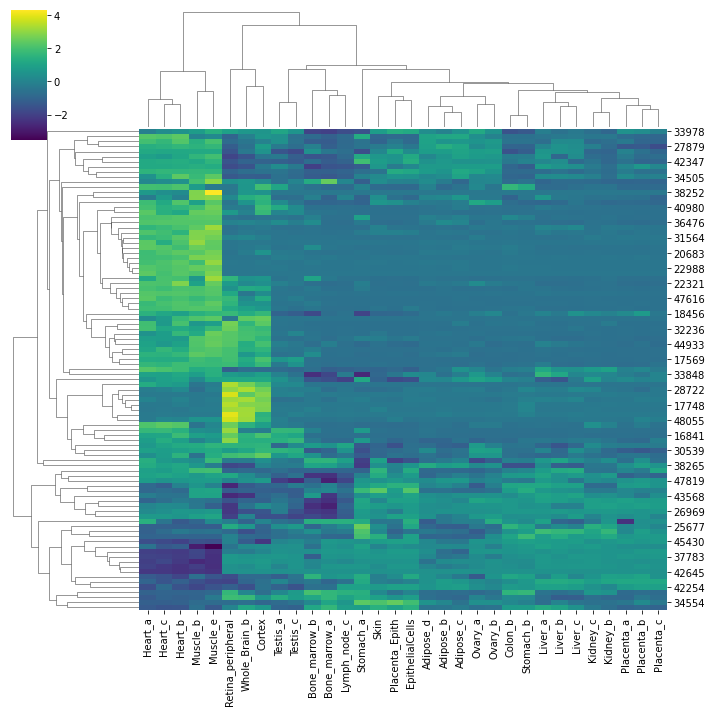

In [12]:
psi['std']=psi[tissues].std(axis = 1, skipna = True) 
psi['mean']=psi[tissues].mean(axis = 1, skipna = True) 
psi_var=psi[psi['std']>20]
g = sns.clustermap(psi_var[tissues],cmap="viridis",z_score=0)
g.savefig("AS data/Heatmap.pdf",format='pdf')

In [13]:
for t in list(tissue.keys()):

    psi[t]=psi[tissue[t]].mean(axis = 1, skipna = True) 

In [14]:
psi_tissue=psi[['EVENT']+list(tissue.keys())]

In [15]:
tissues=list(tissue.keys())

In [16]:
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary
14460,HsaEX0000112,87.404,94.183333,94.700000,95.746667,97.266667,98.673333,98.280,95.410000,98.395,97.223333,90.510
14475,HsaEX0000140,0.892,1.663333,2.443333,2.310000,1.240000,2.306667,2.015,1.256667,4.605,1.986667,1.565
14476,HsaEX0000143,0.088,0.220000,0.120000,1.603333,0.236667,0.126667,0.465,0.690000,2.065,4.723333,0.130
14510,HsaEX0000234,82.186,86.530000,98.633333,90.413333,98.896667,99.320000,88.390,87.596667,94.800,72.000000,93.490
14625,HsaEX0000543,0.480,1.356667,1.516667,0.943333,20.790000,4.806667,0.575,1.186667,3.200,2.853333,3.330
...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,96.390,94.620000,89.600000,98.290000,98.403333,97.210000,92.655,97.450000,99.275,95.633333,96.240
50140,HsaEX0074521,0.942,0.570000,0.430000,1.863333,0.573333,1.866667,1.815,1.666667,4.170,2.293333,5.200
50141,HsaEX0074523,99.246,100.000000,99.120000,98.056667,100.000000,99.540000,99.840,97.283333,99.830,92.980000,99.725
50145,HsaEX0074528,59.932,40.966667,49.496667,74.046667,70.750000,53.230000,51.240,60.886667,35.775,34.400000,55.620


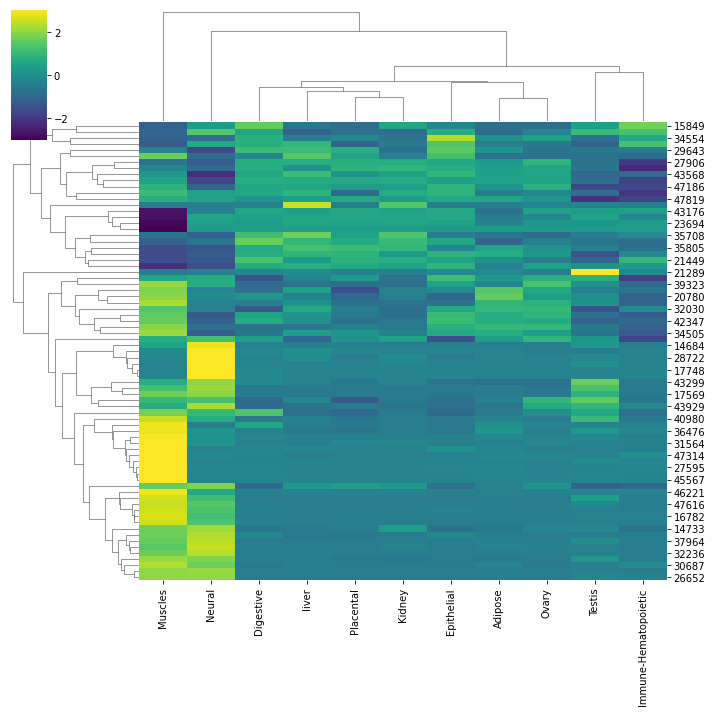

In [17]:
psi_tissue['std']=psi_tissue[tissues].std(axis = 1, skipna = True) 
psi_tissue['mean']=psi_tissue[tissues].mean(axis = 1, skipna = True) 
psi_var=psi_tissue[psi_tissue['std']>20]
g = sns.clustermap(psi_var[tissues],cmap="viridis",z_score=0)
#g.savefig("AS data/VastDB/Heatmap.pdf",format='pdf' )

In [18]:
tissue_interest='Neural'
psi_tissue['Zscore']=(psi_tissue[tissue_interest] - psi_tissue['mean'])/psi_tissue['std']
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary,std,mean,Zscore
14460,HsaEX0000112,87.404,94.183333,94.700000,95.746667,97.266667,98.673333,98.280,95.410000,98.395,97.223333,90.510,3.528340,95.253848,-0.303405
14475,HsaEX0000140,0.892,1.663333,2.443333,2.310000,1.240000,2.306667,2.015,1.256667,4.605,1.986667,1.565,0.991271,2.025788,-0.365646
14476,HsaEX0000143,0.088,0.220000,0.120000,1.603333,0.236667,0.126667,0.465,0.690000,2.065,4.723333,0.130,1.415446,0.951636,-0.516895
14510,HsaEX0000234,82.186,86.530000,98.633333,90.413333,98.896667,99.320000,88.390,87.596667,94.800,72.000000,93.490,8.251929,90.205091,-0.445361
14625,HsaEX0000543,0.480,1.356667,1.516667,0.943333,20.790000,4.806667,0.575,1.186667,3.200,2.853333,3.330,5.819746,3.730758,-0.407937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,96.390,94.620000,89.600000,98.290000,98.403333,97.210000,92.655,97.450000,99.275,95.633333,96.240,2.823207,95.978788,-0.481292
50140,HsaEX0074521,0.942,0.570000,0.430000,1.863333,0.573333,1.866667,1.815,1.666667,4.170,2.293333,5.200,1.511539,1.944576,-0.909388
50141,HsaEX0074523,99.246,100.000000,99.120000,98.056667,100.000000,99.540000,99.840,97.283333,99.830,92.980000,99.725,2.081487,98.692818,0.628004
50145,HsaEX0074528,59.932,40.966667,49.496667,74.046667,70.750000,53.230000,51.240,60.886667,35.775,34.400000,55.620,12.949944,53.303970,-0.952692


In [19]:
psi_filtred=psi_tissue[ psi_tissue['Zscore']>2]
len(psi_filtred)

124

In [20]:
#psi_filtred=psi_filtred[  (psi_filtred['mean']>1) &   (psi_filtred['mean']<90) ]
psi_filtred=psi_filtred[  psi_filtred[tissue_interest]>20 ]
len(psi_filtred)

62

## Clustering and visualization

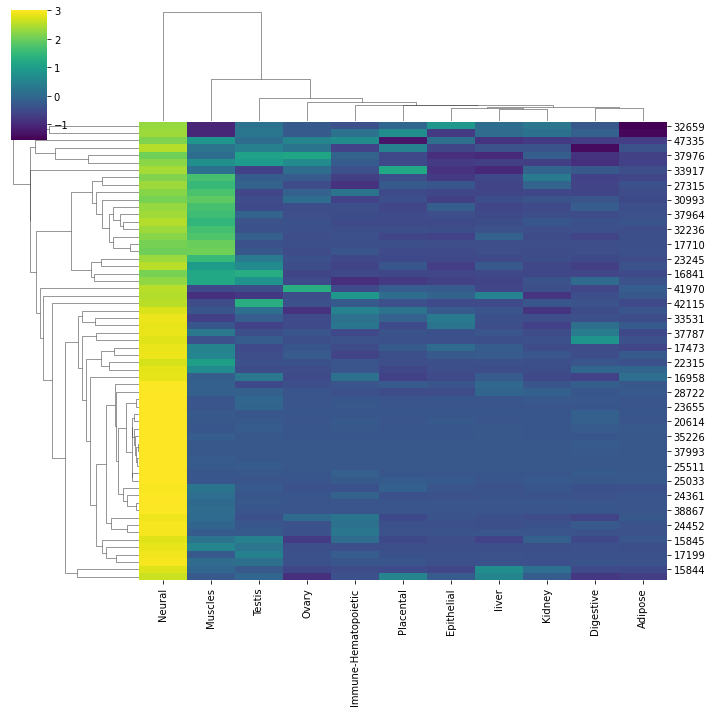

In [21]:
g = sns.clustermap(psi_filtred[tissues],cmap="viridis",z_score=0)

### Prepare the list of events in NEASE format

In [22]:

event_cord=pd.merge(annot,psi_filtred['EVENT'])    

event_cord['start']= event_cord['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
event_cord['end']= event_cord['COORD_o'].apply(lambda x: x.split('-')[1])
#event_cord=event_cord[['GENE','start','end']]
mg = mygene.MyGeneInfo()
out = mg.querymany(list(event_cord.GENE.unique()), scopes="symbol",  fields='ensembl.gene', species="human", verbose=False, as_dataframe = True,
                  df_index = True)
convert_help=out['ensembl.gene'].to_frame().dropna()

# convert gene names to gene IDs using nease functions
#convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
input=pd.merge(event_cord,convert_help,left_on='GENE',right_index=True)
input=input[['ensembl.gene','start','end']].drop_duplicates()
input.head(10)

,ensembl.gene,start,end
0,ENSG00000033627,42508572,42508589
1,ENSG00000066855,65689566,65689599
2,ENSG00000070961,89598657,89598743
3,ENSG00000075945,169925787,169925855
4,ENSG00000263001,74714860,74714916
5,ENSG00000080822,98521653,98521696
6,ENSG00000084234,130137256,130137291
7,ENSG00000087274,2867972,2868129
8,ENSG00000087274,2926642,2926675
9,ENSG00000087470,32705825,32705863


## NEASE analysis


In [23]:
# Run nease with standard input.
events=nease.run(input, organism='Human')

Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
15 protein domains are affected by AS.

1 linear motifs are affected by AS.
1 interacting resiude are affected by AS.

10 of the affected domains/motifs have known interactions.
43 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


In [24]:
# This is an enrichement at gene level: all (diff) spliced genes.
# The function use the library gseapy and need gseapy_databases parameter 
# let first check what libraries are available on gseapy for Human

import gseapy as gp
Human = gp.get_library_name(database='Human')
Human[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [25]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['KEGG_2019_Human'])
enr

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Endocrine and other factor-regulated calcium reabsorption,4/48,0.000008,0.000575,0,0,36.185455,422.674973,CLTB;CLTA;AP2A1;ATP2B1
1,KEGG_2019_Human,Synaptic vesicle cycle,4/78,0.000058,0.001985,0,0,21.483243,209.431861,CLTB;CLTA;AP2A1;ATP6V0A1
2,KEGG_2019_Human,Lysosome,4/123,0.000340,0.007699,0,0,13.329076,106.466958,AP1B1;CLTB;CLTA;ATP6V0A1
3,KEGG_2019_Human,cGMP-PKG signaling pathway,4/166,0.001048,0.017813,0,0,9.769877,67.031683,PPP3CA;ATP2B1;MEF2D;GTF2I
4,KEGG_2019_Human,Huntington disease,4/193,0.001824,0.024806,0,0,8.362751,52.741753,DCTN4;CLTB;CLTA;AP2A1
...,...,...,...,...,...,...,...,...,...,...
63,KEGG_2019_Human,Human T-cell leukemia virus 1 infection,1/219,0.448632,0.476672,0,0,1.707461,1.368617,PPP3CA
64,KEGG_2019_Human,Human cytomegalovirus infection,1/225,0.457603,0.478723,0,0,1.661220,1.298663,PPP3CA
65,KEGG_2019_Human,Thermogenesis,1/231,0.466431,0.480565,0,0,1.617391,1.233497,SMARCC2
66,KEGG_2019_Human,MAPK signaling pathway,1/295,0.552243,0.560485,0,0,1.261199,0.748859,PPP3CA


### NEASE analysis


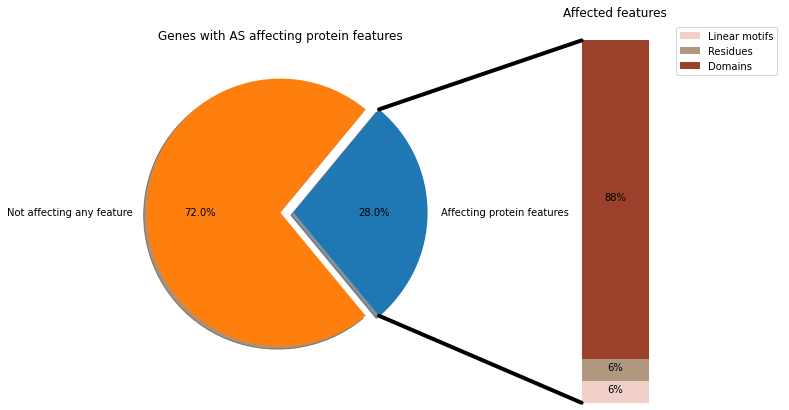

In [26]:
events.get_stats('AS data/VastDB/')

In [27]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains()

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Interaction type,Visualization link
0,ATP6V0A1,535,ENSG00000033627,ENSE00002384160,PF01496,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002384160
1,ATP2B1,490,ENSG00000070961,ENSE00000909420,PF12424,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00000909420
2,DNM1L,10059,ENSG00000087470,ENSE00003507654,PF00350,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003507654
3,SH3GLB1,51100,ENSG00000097033,ENSE00001013176,PF03114,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001013176
4,ABLIM1,3983,ENSG00000099204,ENSE00000811956,PF16182,-,False,None,
5,TPD52L2,7165,ENSG00000101150,ENSE00001385875,PF04201,-,False,None,
6,NRBP1,29959,ENSG00000115216,ENSE00001561634,PF07714,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001561634
7,CLTA,1211,ENSG00000122705,ENSE00000699567,PF01086,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00000699567
8,PARP6,56965,ENSG00000137817,ENSE00003550643,PF00644,-,False,None,
9,ABI2,10152,ENSG00000138443,ENSE00003679000,PF07815,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003679000


In [28]:
# get the affected linear motifs
events.get_elm()

,Gene name,entrezgene,Gene stable ID,ELMIdentifier,dPSI,ELM link
1,ATP2B1,490,ENSG00000070961,TRG_DiLeu_BaLyEn_6,-,http://elm.eu.org/elms/TRG_DiLeu_BaLyEn_6


In [29]:
# get interacting residues affected by AS
events.get_pdb()

,Gene name,NCBI gene ID,Gene stable ID,Co-resolved interactions symbol,Co-resolved interactions
0,DNM1L,10059,ENSG00000087470,DNM1L,10059


In [30]:
# List of affected interactions (domain and motifs binding)
events.get_edges()

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,HERC4,26091,PF00632,-,10,"UBE2E3,UBE2J2,UBC,HERC6,USP5,HERC4,BAG3,UBE2D2,RAD23A,UBE2L3","7332,118424,10477,7316,55008,8078,26091,9531,5886,7322"
1,ATP6V0A1,535,PF01496,-,7,"ATP6V0A2,ATP6V0D2,ATP6V1E1,ATP6V0D1,ATP6V1D,ATP6V0E1,ATP6V1B1","23545,245972,529,9114,51382,8992,525"
2,CLTB,1212,PF01086,-,6,"HIP1,VPS41,CLTCL1,PICALM,HIP1R,CLTC","3092,27072,8218,8301,9026,1213"
3,DNM1L,10059,PF00350,-,5,"DDX39B,DNM1L,MYH11,EIF4A3,DDX21","7919,10059,4629,9775,9188"
4,SH3GLB1,51100,PF03114,-,4,"SH3GLB2,ARHGAP17,SH3GL1,SH3GLB1","56904,55114,6455,51100"
5,ABI2,10152,PF07815,-,4,"NCKAP1L,CYFIP2,CYFIP1,NCKAP1","3071,26999,23191,10787"
6,CLTA,1211,PF01086,-,3,"CLTCL1,PICALM,CLTC","8218,8301,1213"
7,NRBP1,29959,PF07714,-,2,"GSK3B,CD2AP","2932,23607"
8,ATP2B1,490,PF12424,-,1,CALM1,801
9,NPTN,27020,PF13927,-,1,BSG,682


### NEASE enrichment


In [31]:
nease_enr=events.enrich(database=['KEGG'])
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 10 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04721,Synaptic vesicle cycle - Homo sapiens (human),KEGG,"ATP6V0A1 (7), CLTA (2), CLTB (2)",1.494631e-16,4.797767e-14,27.410511
1,path:hsa04142,Lysosome - Homo sapiens (human),KEGG,"ATP6V0A1 (3), CLTA (2), CLTB (2)",2.060571e-10,2.204811e-08,16.776666
2,path:hsa04966,Collecting duct acid secretion - Homo sapiens (human),KEGG,ATP6V0A1 (7),1.651039e-13,2.649917e-11,12.782243
3,path:hsa05323,Rheumatoid arthritis - Homo sapiens (human),KEGG,ATP6V0A1 (7),1.890020e-09,1.516741e-07,8.723534
4,path:hsa00190,Oxidative phosphorylation - Homo sapiens (human),KEGG,ATP6V0A1 (7),4.365461e-09,2.802626e-07,8.359970
5,path:hsa05110,Vibrio cholerae infection - Homo sapiens (human),KEGG,ATP6V0A1 (7),1.761945e-08,9.426408e-07,7.754008
6,path:hsa04145,Phagosome - Homo sapiens (human),KEGG,ATP6V0A1 (7),2.419837e-06,1.109668e-04,5.616214
7,path:hsa04961,Endocrine and other factor-regulated calcium reabsorption - Homo sapiens (human),KEGG,"CLTA (2), CLTB (2)",2.735117e-04,9.755251e-03,5.038877
8,path:hsa05100,Bacterial invasion of epithelial cells - Homo sapiens (human),KEGG,"NRBP1 (1), CLTA (2), CLTB (2)",1.824754e-03,5.076835e-02,4.743733
9,path:hsa04144,Endocytosis - Homo sapiens (human),KEGG,"SH3GLB1 (3), CLTA (2), CLTB (2)",1.897882e-03,5.076835e-02,4.714176


### Compare the classic gene enrichment with NEASE



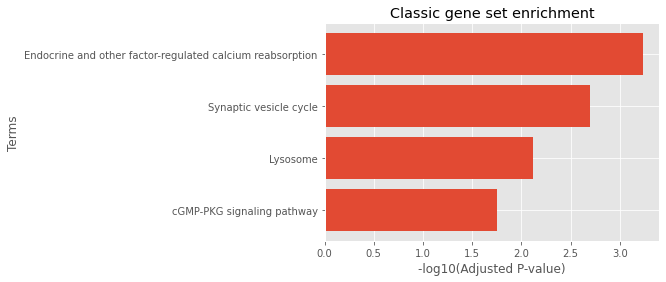

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:4]
Pvalues =enr['Adjusted P-value'][:4]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/VastDB/classic_enr_neural.pdf',format='pdf',bbox_inches='tight')
plt.show()

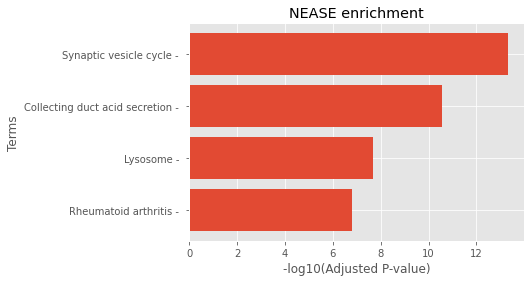

In [33]:
nease_enr=nease_enr.sort_values(by='adj p_value')
Term = nease_enr['Pathway name'][:4]
Pvalues =nease_enr['adj p_value'][:4]
Pvalues=[ -np.log10(x) for x in Pvalues]
Term = [x.split('Homo')[0] for x in Term]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/VastDB/nease_enr_neural.pdf',format='pdf',bbox_inches='tight')
plt.show()

### Pathway specific analysis

In [34]:
events.path_analysis('path:hsa04721')

Enrichment of the pathway: Synaptic vesicle cycle - Homo sapiens (human).

Overall p_value:  1.494631493736333e-16




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,ATP6V0A1,535,True,7/7,5.853289e-17,"ATP6V0A2,ATP6V0D2,ATP6V1E1,ATP6V0D1,ATP6V1D,ATP6V0E1,ATP6V1B1","23545,245972,529,9114,51382,8992,525"
1,CLTA,1211,True,2/3,6.943483e-05,"CLTCL1,CLTC","8218,1213"
2,CLTB,1212,True,2/6,3.438502e-04,"CLTCL1,CLTC","8218,1213"


### Visualization


In [35]:
events.Vis_path('path:hsa04721',file='AS data/',k=0.8)

Enrichment of the pathway: Synaptic vesicle cycle - Homo sapiens (human).

Overall p_value:  1.494631493736333e-16


Visualization of the pathway generated in: AS data/Synaptic vesicle cycle - Homo sapiens (human).html


## Permutation analysis

In [50]:
import random

import sys, os
from tqdm import tqdm
# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

In [48]:
p_value_path= 1.494631493736333e-16


In [ ]:
numb_of_events=len(psi_filtred)

path_of_interest='path:hsa04721'


scores=[]
p_values=[]
for i in tqdm(range(5000)):
    events_shuflled=psi_tissue.EVENT.unique()
    random.shuffle(events_shuflled)
    events_shuflled=events_shuflled[:numb_of_events]
    event_rand=annot[annot.EVENT.isin(events_shuflled)]
    event_rand['start']= event_rand['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
    event_rand['end']= event_rand['COORD_o'].apply(lambda x: x.split('-')[1])
    convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
    input=pd.merge(event_rand,convert_help,left_on='GENE',right_on='Gene name')
    input=input[['Gene stable ID','start','end']].drop_duplicates()
    blockPrint()

    events=nease.run(input, organism='Human')
    nease_enr=events.enrich(database=['KEGG'])
    scores.append(float(nease_enr[nease_enr['Pathway ID'] ==path_of_interest]['Nease score']))
    p_values.append(float(nease_enr[nease_enr['Pathway ID'] ==path_of_interest]['p_value']))

  9%|▉         | 440/5000 [1:53:16<19:58:13, 15.77s/it]

In [52]:
len(p_values)

5000

In [ ]:
for i in tqdm(range(5000)):
    events_shuflled=psi_tissue.EVENT.unique()
    random.shuffle(events_shuflled)
    events_shuflled=events_shuflled[:numb_of_events]
    event_rand=annot[annot.EVENT.isin(events_shuflled)]
    event_rand['start']= event_rand['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
    event_rand['end']= event_rand['COORD_o'].apply(lambda x: x.split('-')[1])
    convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
    input=pd.merge(event_rand,convert_help,left_on='GENE',right_on='Gene name')
    input=input[['Gene stable ID','start','end']].drop_duplicates()
    blockPrint()

    events=nease.run(input, organism='Human')
    nease_enr=events.enrich(database=['KEGG'])
    scores.append(float(nease_enr[nease_enr['Pathway ID'] ==path_of_interest]['Nease score']))
    p_values.append(float(nease_enr[nease_enr['Pathway ID'] ==path_of_interest]['p_value']))

 21%|██        | 1038/5000 [3:48:24<13:56:54, 12.67s/it]

In [61]:
len([x for x in p_values if x<=p_value_path])/len(p_values)

0.0008